# 0. Importing packages

In [1]:
# Load the autoreload extension to automatically reload modules before executing code (to avoid restarting the kernel)
%load_ext autoreload 
# NB. uncomment the line above first time you run this cell
%autoreload 2

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from resources.network_functions import NetworkEdgeListConstructor, GraphConstructor, NetworkVisualizer3

## 0.1 File Paths

In [2]:
### File path ###
fp_main = Path('/Volumes/SAM-SODAS-DISTRACT/Coding Distraction/github_as_a_market_device')
fp_main_output = Path(fp_main / 'output')

# 1 Load in data

In [3]:
# Read in the data
github_data = pd.read_parquet(fp_main_output / 'unique_users_first_second.gzip.parquet')
github_data

,user_login,search_with_company,listed_company,inferred_company,matched_company_strings,usertype,email,location,bio,blog,...,follows_in,follows_out,watches_in,watches_out,stars_in,stars_out,forks_in,forks_out,unique_ties,tier
0,NodesAMS,nodes,Nodes Agency,nodes,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,None,[CPH],Nodes \r\nApplication Management Service,https://www.nodesagency.com,...,[],[],[],[],[],[],[],"[{'created_at': '2022-10-14', 'owner_login': '...",[ml-opensource],1
1,nodes-checkout,nodes,Nodes.dk,nodes,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,cw@nodes.dk,"[dk, dk, dk, Copenhagen, Denmark]",None,http://www.nodes.dk/,...,[],[],[],"[{'created_at': '2015-01-29', 'owner_login': '...",[],[],[],[],[ml-archive],1
2,nodes-team,nodes,Nodes Agency,nodes,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,None,[Copenhagen],None,http://nodesagency.com,...,[],[],[],"[{'created_at': '2016-03-27', 'owner_login': '...",[],[],[],[],[ml-archive],1
3,abtion,abtion,None,abtion,"{'abtion': ['abtion', 'iwanttowork@abtion.com'...",Organization,iwanttowork@abtion.com,[Copenhagen],Not another digital agency,https://abtion.com,...,"[{'created_at': '2014-01-12', 'owner_login': '...",[],"[{'created_at': '2012-02-23', 'owner_login': '...",[],"[{'created_at': '2015-08-26', 'owner_login': '...",[],"[{'created_at': '2025-05-05', 'owner_login': '...","[{'created_at': '2020-12-10', 'owner_login': '...","[karuncs, heatherm, runephilosof, jekyll, Geof...",1
4,hcarreras,abtion,Abtion,abtion,"{'abtion': ['abtion', 'hc@abtion.com', 'abtion...",User,hc@abtion.com,[Copenhagen],None,abtion.com,...,"[{'created_at': '2009-07-02', 'owner_login': '...","[{'created_at': '2008-03-31', 'owner_login': '...","[{'created_at': '2014-11-04', 'owner_login': '...","[{'created_at': '2010-10-26', 'owner_login': '...","[{'created_at': '2014-01-01', 'owner_login': '...","[{'created_at': '2018-05-31', 'owner_login': '...","[{'created_at': '2015-05-06', 'owner_login': '...","[{'created_at': '2018-04-13', 'owner_login': '...","[PartidoDeInternet, bureson, tareksamni, knoop...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,johalexander,shape,@shapehq,shape,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,alexander.johansson@framna.com,"[Copenhagen, Denmark]",None,,...,"[{'created_at': '2016-03-10', 'owner_login': '...",[],"[{'created_at': '2016-03-10', 'owner_login': '...","[{'created_at': '2015-03-11', 'owner_login': '...","[{'created_at': '2021-09-09', 'owner_login': '...","[{'created_at': '2020-10-01', 'owner_login': '...","[{'created_at': '2023-10-13', 'owner_login': '...","[{'created_at': '2018-07-17', 'owner_login': '...",None,2
425,GSala,shape,@shapehq,shape,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,None,"[Copenhagen, Denmark]",None,,...,"[{'created_at': '2013-08-03', 'owner_login': '...","[{'created_at': '2009-03-24', 'owner_login': '...","[{'created_at': '2012-03-14', 'owner_login': '...","[{'created_at': '2016-04-23', 'owner_login': '...",[],"[{'created_at': '2023-05-12', 'owner_login': '...",[],[],None,2
426,adrian-shape,shape,Shape,shape,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,None,[Copenhagen],Android Developer,,...,[],"[{'created_at': '2011-05-30', 'owner_login': '...",[],"[{'created_at': '2024-05-30', 'owner_login': '...",[],"[{'created_at': '2024-01-22', 'owner_login': '...",[],[],None,2
427,gconde-shape,shape,@shapehq,shape,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,None,[Copenhagen],iOS Developer,,...,[],"[{'created_at': '2012-04-19', 'owner_login': '...",[],[],[],"[{'created_at': '2024-11-17', 'owner_login': '...",[],[],None,2


In [4]:
constructor = NetworkEdgeListConstructor(github_data)
all_edges_user_level, attention_edges_user_level, collaboration_edges_user_level = constructor.get_edge_lists()
print(f'Number of edges in the user-level network: {len(all_edges_user_level)}')
print(f'Number of attention edges in the user-level network: {len(attention_edges_user_level)}')
print(f'Number of collaboration edges in the user-level network: {len(collaboration_edges_user_level)}')

# Save the edgelist using gzip parquet
all_edges_user_level.to_parquet(fp_main_output / 'all_edges_user_level.gzip.parquet')
attention_edges_user_level.to_parquet(fp_main_output / 'attention_edges_user_level.gzip.parquet')
collaboration_edges_user_level.to_parquet(fp_main_output / 'collaboration_edges_user_level.gzip.parquet')

Number of edges in the user-level network: 4066
Number of attention edges in the user-level network: 3969
Number of collaboration edges in the user-level network: 97


In [5]:
all_edges_user_level

,src,target,src_company,target_company,src_company_category,src_company_label,target_company_category,target_company_label,d_intra_level,d_inter_level,edge_repo,action,created_at
0,GeoffAbtion,abtion,abtion,abtion,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,guidelines/GeoffAbtion,forks,2019-02-04
1,viesii,abtion,abtion,abtion,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,abt/viesii,stars,2015-08-26
2,dj-abtion,abtion,abtion,abtion,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,guidelines/dj-abtion,stars,2018-10-01
3,hcarreras,abtion,abtion,abtion,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,guidelines/hcarreras,stars,2012-02-23
4,jeppester,abtion,abtion,abtion,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,rails-template/jeppester,stars,2011-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,AresL,shapehq,shape,shape,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,framna-docs/AresL,stars,2023-10-09
4062,AresL,AresL,shape,shape,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,IEDb/AresL,watches,2017-11-13
4063,AresL,AresL,shape,shape,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,Online-Currency-Calculator/AresL,watches,2017-12-15
4064,AresL,AresL,shape,shape,1,1 Digital and marketing consultancies,1,1 Digital and marketing consultancies,1,0,game-attempt/AresL,watches,2019-09-03


In [6]:
gc_attention = GraphConstructor(all_edges_user_level, graph_type='attention')
attention_graph = gc_attention.get_graph()
print("Attention Graph edges:", attention_graph.edges(data=True))

gc_collaboration = GraphConstructor(all_edges_user_level, graph_type='collaboration')
collaboration_graph = gc_collaboration.get_graph()
print("Collaboration Graph edges:", collaboration_graph.edges(data=True))

Attention Graph edges: [('immeo', 'immeo', {'weight': 2, 'follows': 0, 'stars': 0, 'watches': 11, 'd_intra_level': 1, 'd_inter_level': 0}), ('deondigital', 'jobindex', {'weight': 2, 'follows': 0, 'stars': 1, 'watches': 2, 'd_intra_level': 0, 'd_inter_level': 1}), ('deondigital', 'deondigital', {'weight': 4, 'follows': 0, 'stars': 6, 'watches': 15, 'd_intra_level': 1, 'd_inter_level': 0}), ('deondigital', 'nuuday', {'weight': 1, 'follows': 0, 'stars': 1, 'watches': 0, 'd_intra_level': 0, 'd_inter_level': 1}), ('uptime', 'uptime', {'weight': 6, 'follows': 4, 'stars': 7, 'watches': 70, 'd_intra_level': 1, 'd_inter_level': 0}), ('uptime', 'must', {'weight': 1, 'follows': 0, 'stars': 2, 'watches': 0, 'd_intra_level': 0, 'd_inter_level': 1}), ('nuuday', 'shape', {'weight': 1, 'follows': 2, 'stars': 0, 'watches': 0, 'd_intra_level': 0, 'd_inter_level': 1}), ('nuuday', 'nuuday', {'weight': 16, 'follows': 20, 'stars': 6, 'watches': 76, 'd_intra_level': 1, 'd_inter_level': 0}), ('nuuday', 'jobin

Plotting Attention Graph
Plot saved as attention_graph.png


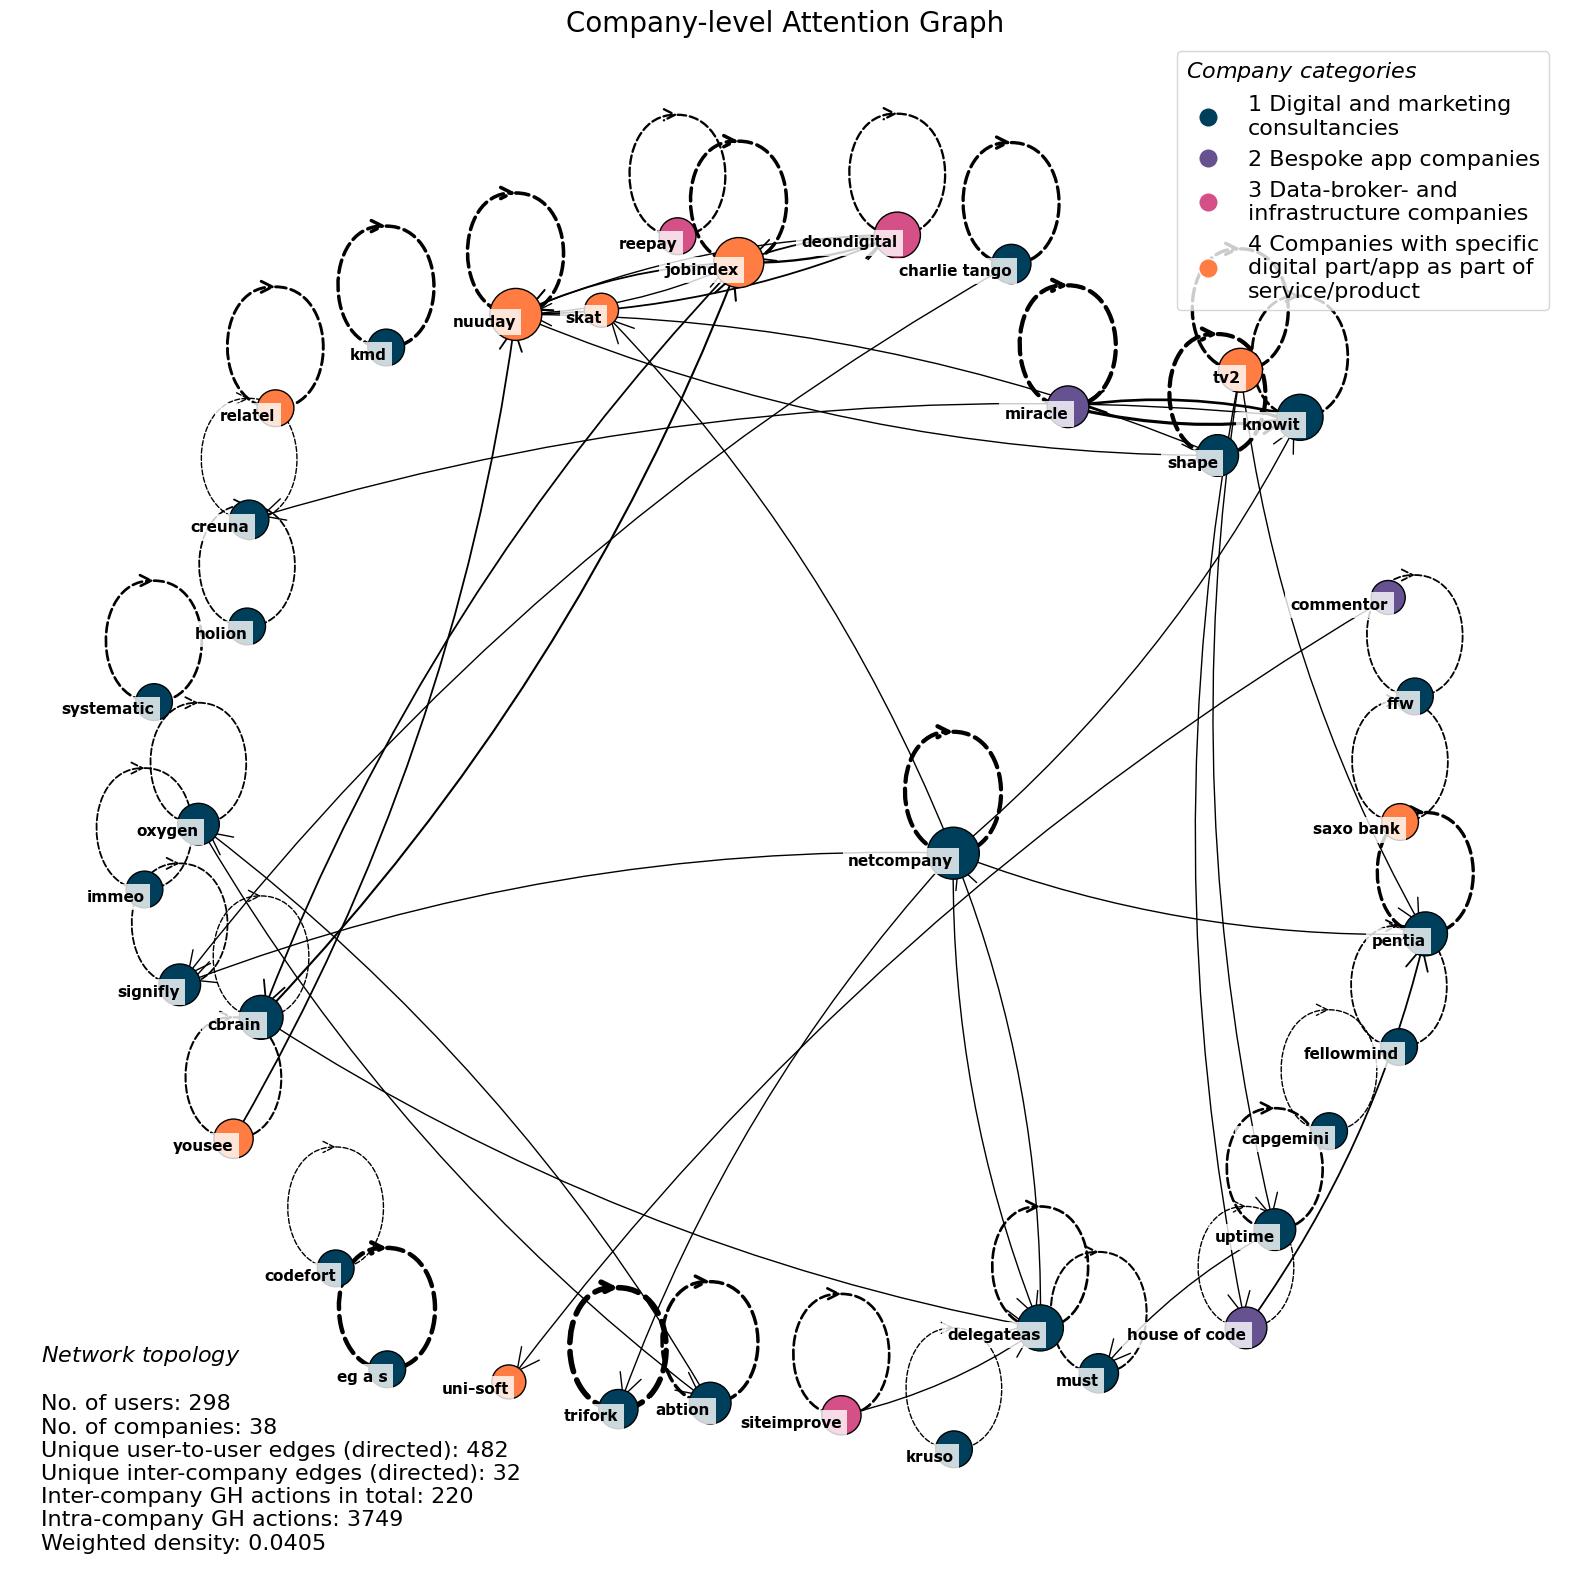

Plotting Collaboration Graph
Plot saved as collaboration_graph.png


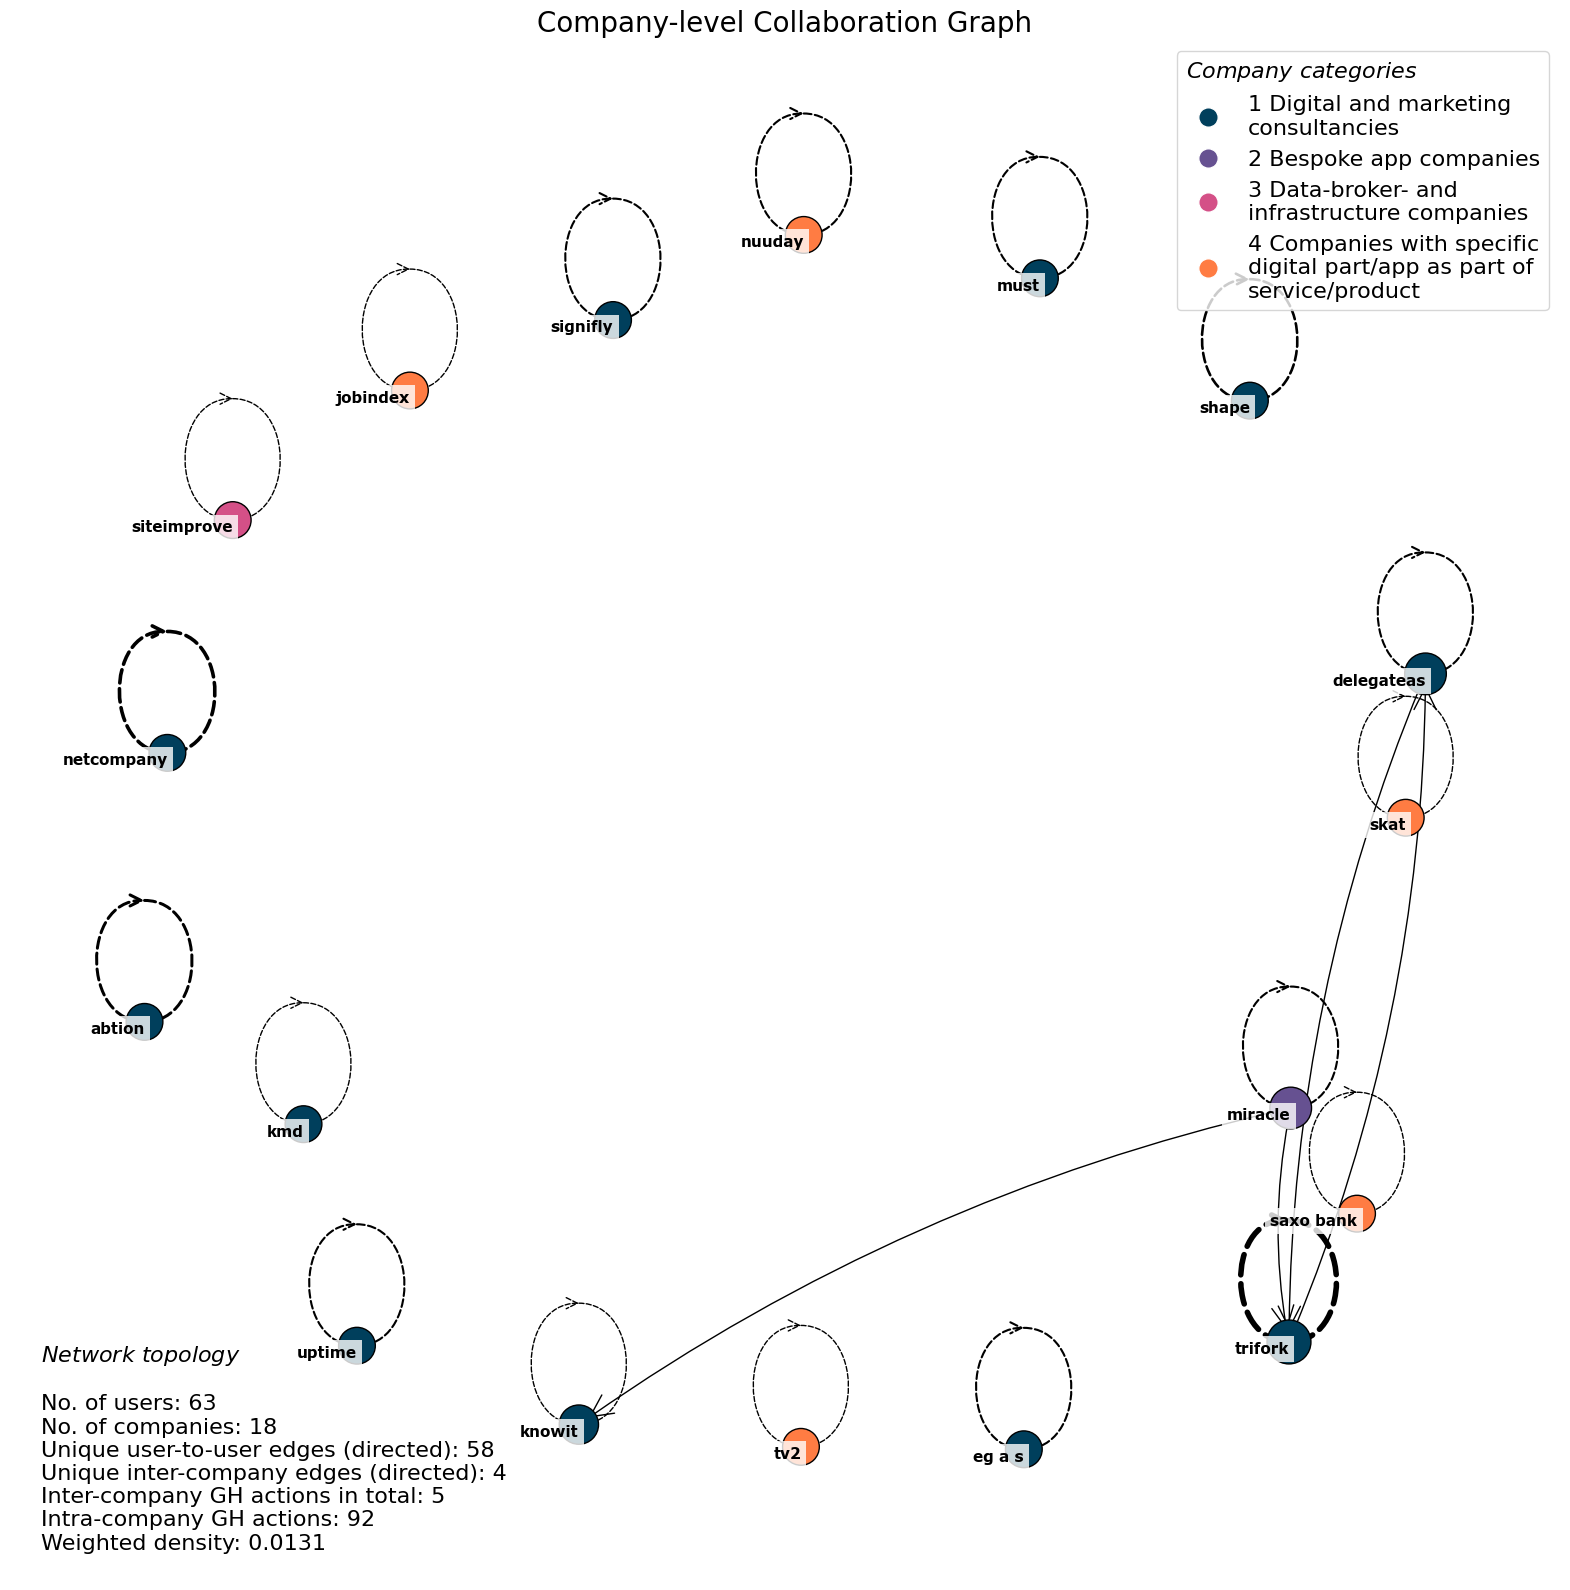

In [7]:
# Visualize Attention Graph
attention_viz = NetworkVisualizer3(attention_graph, edgelist=all_edges_user_level, graph_type='attention')

print("Plotting Attention Graph")
fig_attention = attention_viz.create_plot(title="Company-level Attention Graph");
attention_viz.save_plot_as_png(fig_attention, 'attention_graph.png')
plt.show()

# Visualize Collaboration Graph
collab_viz = NetworkVisualizer3(collaboration_graph, edgelist=all_edges_user_level, graph_type='collaboration')

print("Plotting Collaboration Graph")
fig_collab = collab_viz.create_plot(title="Company-level Collaboration Graph");
collab_viz.save_plot_as_png(fig_collab, 'collaboration_graph.png')
plt.show()
